In [60]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt

In [61]:
url = "https://www.pro-football-reference.com/years/2021/passing.htm"

html = urlopen(url)
stats_page = BeautifulSoup(html)

In [62]:
header = stats_page.findAll('tr')[0]
header = [i.getText() for i in header.findAll(('th'))]

In [63]:
rows = stats_page.findAll('tr')[1:]

stats = []
for i in range(len(rows)):
    stats.append([col.getText() for col in rows[i].findAll('td')])

In [64]:
qb_data = pd.DataFrame(stats, columns=header[1:])

In [65]:
qb_data.head()

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,Sk%,NY/A,ANY/A,4QC,GWD
0,Tom Brady*,TAM,44,QB,17,17,13-4-0,485,719,67.5,...,312.7,102.1,68.1,22,144,3,6.98,7.41,3,5
1,Justin Herbert*,LAC,23,QB,17,17,9-8-0,443,672,65.9,...,294.9,97.7,65.6,31,214,4.4,6.83,6.95,5,5
2,Matthew Stafford,LAR,33,QB,17,17,12-5-0,404,601,67.2,...,287.4,102.9,63.8,30,243,4.8,7.36,7.45,3,4
3,Patrick Mahomes*,KAN,26,QB,17,17,12-5-0,436,658,66.3,...,284.6,98.5,62.2,28,146,4.1,6.84,7.07,3,3
4,Derek Carr,LVR,30,QB,17,17,10-7-0,428,626,68.4,...,282.6,94.0,52.4,40,241,6,6.85,6.60,3,6


In [66]:
qb_data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'Sk%', 'NY/A', 'ANY/A', '4QC',
       'GWD'],
      dtype='object')

In [67]:
columns = qb_data.columns.values
columns[-6] = "Sack_Yds"
qb_data.columns = columns

In [68]:
stat_categories = ['Cmp%', 'Yds', 'TD', 'Int%', 'Y/A', 'Rate']

In [69]:
stat_build = qb_data[["Player", "Tm"] + stat_categories]
stat_build.head()

,Player,Tm,Cmp%,Yds,TD,Int%,Y/A,Rate
0,Tom Brady*,TAM,67.5,5316,43,1.7,7.4,102.1
1,Justin Herbert*,LAC,65.9,5014,38,2.2,7.5,97.7
2,Matthew Stafford,LAR,67.2,4886,41,2.8,8.1,102.9
3,Patrick Mahomes*,KAN,66.3,4839,37,2,7.4,98.5
4,Derek Carr,LVR,68.4,4804,23,2.2,7.7,94.0


In [70]:
stat_build.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int%      object
Y/A       object
Rate      object
dtype: object

In [71]:
for i in stat_categories:
    stat_build[i] = pd.to_numeric(qb_data[i])

/Users/vikramchoudhry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
stat_build.dtypes

Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int%      float64
Y/A       float64
Rate      float64
dtype: object

In [73]:
stat_build["Player"] = stat_build["Player"].str.replace("*", "")
stat_build["Player"] = stat_build["Player"].str.replace("+", "")

/Users/vikramchoudhry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/Users/vikramchoudhry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/vikramchoudhry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions

In [74]:
stat_build.head(10)

,Player,Tm,Cmp%,Yds,TD,Int%,Y/A,Rate
0,Tom Brady,TAM,67.5,5316.0,43.0,1.7,7.4,102.1
1,Justin Herbert,LAC,65.9,5014.0,38.0,2.2,7.5,97.7
2,Matthew Stafford,LAR,67.2,4886.0,41.0,2.8,8.1,102.9
3,Patrick Mahomes,KAN,66.3,4839.0,37.0,2.0,7.4,98.5
4,Derek Carr,LVR,68.4,4804.0,23.0,2.2,7.7,94.0
5,Joe Burrow,CIN,70.4,4611.0,34.0,2.7,8.9,108.3
6,Dak Prescott,DAL,68.8,4449.0,37.0,1.7,7.5,104.2
7,Josh Allen,BUF,63.3,4407.0,36.0,2.3,6.8,92.2
8,Kirk Cousins,MIN,66.3,4221.0,33.0,1.2,7.5,103.1
9,Aaron Rodgers,GNB,68.9,4115.0,37.0,0.8,7.7,111.9


In [75]:
filtered_stats = stat_build[stat_build["Yds"] > 1000]

In [76]:
for value in stat_categories:
    filtered_stats[value + "_Rank"] = filtered_stats[value].rank(pct=True)

filtered_stats["Int_Rank"] = 1-filtered_stats["Int_Rank"]

/Users/vikramchoudhry/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: 'Int_Rank'

In [77]:
filtered_stats.head(10)

,Player,Tm,Cmp%,Yds,TD,Int%,Y/A,Rate,Cmp%_Rank,Yds_Rank,TD_Rank,Int%_Rank,Y/A_Rank,Rate_Rank
0,Tom Brady,TAM,67.5,5316.0,43.0,1.7,7.4,102.1,0.777778,1.000000,1.000000,0.250000,0.680556,0.805556
1,Justin Herbert,LAC,65.9,5014.0,38.0,2.2,7.5,97.7,0.527778,0.972222,0.944444,0.541667,0.763889,0.694444
2,Matthew Stafford,LAR,67.2,4886.0,41.0,2.8,8.1,102.9,0.722222,0.944444,0.972222,0.791667,0.944444,0.861111
3,Patrick Mahomes,KAN,66.3,4839.0,37.0,2.0,7.4,98.5,0.569444,0.916667,0.888889,0.388889,0.680556,0.722222
4,Derek Carr,LVR,68.4,4804.0,23.0,2.2,7.7,94.0,0.888889,0.888889,0.666667,0.541667,0.847222,0.611111
5,Joe Burrow,CIN,70.4,4611.0,34.0,2.7,8.9,108.3,1.000000,0.861111,0.805556,0.736111,1.000000,0.972222
6,Dak Prescott,DAL,68.8,4449.0,37.0,1.7,7.5,104.2,0.916667,0.833333,0.888889,0.250000,0.763889,0.944444
7,Josh Allen,BUF,63.3,4407.0,36.0,2.3,6.8,92.2,0.333333,0.805556,0.833333,0.583333,0.333333,0.555556
8,Kirk Cousins,MIN,66.3,4221.0,33.0,1.2,7.5,103.1,0.569444,0.777778,0.777778,0.055556,0.763889,0.902778
9,Aaron Rodgers,GNB,68.9,4115.0,37.0,0.8,7.7,111.9,0.944444,0.750000,0.888889,0.027778,0.847222,1.000000


In [78]:
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 14

In [114]:
team_colors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d',
               'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00',
               'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731',
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837',
               'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683',
               'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740',
               'LVR':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000',
               'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

In [115]:
splits = np.pi/6
angles = np.linspace(0,2*np.pi, len(stat_categories)+1) + splits

In [116]:
def create_radar_chart(ax, angles, player_data, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(player_data[-(len(angles)-1):], player_data[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(stat_categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, player_data[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [117]:
def get_qb_data(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

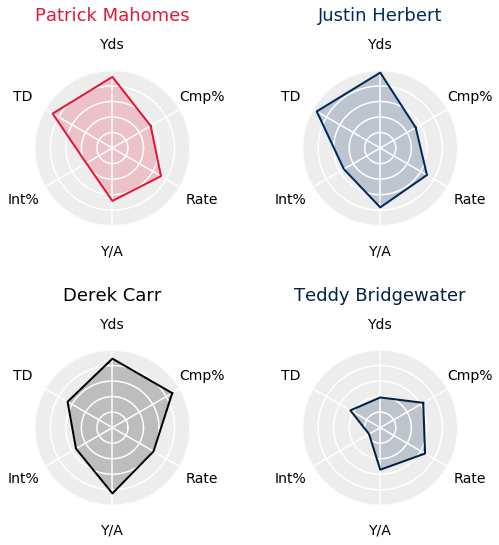

In [118]:
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')


# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
kan_data = get_qb_data(filtered_stats, 'KAN')
lac_data = get_qb_data(filtered_stats, 'LAC')
lvr_data = get_qb_data(filtered_stats, 'LVR')
den_data = get_qb_data(filtered_stats, 'DEN')




# Plot QB data
ax1 = create_radar_chart(ax1, angles, kan_data, team_colors['KAN'])
ax2 = create_radar_chart(ax2, angles, lac_data, team_colors['LAC'])
ax3 = create_radar_chart(ax3, angles, lvr_data, team_colors['LVR'])
ax4 = create_radar_chart(ax4, angles, den_data, team_colors['DEN'])



plt.show()